# Peter Duggins
# SYDE 556/750
# Jan 25, 2015
# Assignment 1

In [130]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


##### SYDE556/750 Assignment 1: Representation in Populations of Neurons

- Due Date: January 25th at midnight
- Total marks: 20 (20% of final grade)
- Late penalty: 1 mark per day
- It is recommended that you use a language with a matrix library and graphing capabilities.  Two main suggestions are Python and MATLAB.
- *Do not use any code from Nengo*

## 1) Representation of Scalars

### 1.1) Basic encoding and decoding

Write a program that implements a neural representation of a scalar value $x$.  For the neuron model, use a rectified linear neuron model ($a=max(J,0)$).  Choose the maximum firing rates randomly (uniformly distributed between 100Hz and 200Hz at x=1), and choose the x-intercepts randomly (uniformly distributed between -0.95 and 0.95).  Use those values to compute the corresponding $\alpha$ and $J^{bias}$ parameters for each neuron.  The encoders $e$ are randomly chosen and are either +1 or -1 for each neuron.




## Below are the general purpose classes and methods required for the assignment as a whole. This cell should be run before the subsequent blocks, which contain the code for each part of each question, including parameter setting and plotting.

In [131]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit

class ReLUneuron():

    def __init__(self,x_intercept,max_firing_rate,encoder):
        self.xintercept=x_intercept
        self.maxrate=max_firing_rate
        self.e=encoder
        self.alpha=self.maxrate/(1 - self.xintercept)    #alpha=slope=(y2-y1)/(x2-x1)
        self.Jbias=self.maxrate-self.alpha
        self.sample_rates=[]
        self.sample_rates_noisy=[]
        self.custom_rates=[]
        self.custom_rates_noisy=[]
        self.custom_x=np.array([])

    def set_sample_rates(self,x_vals):
        self.sample_x=x_vals
        self.sample_rates=[]
        for x in x_vals:
            J=np.maximum(0,self.alpha*np.dot(x,self.e)+self.Jbias)
            self.sample_rates.append(float(np.maximum(0,J)))
        return self.sample_rates

    def set_sample_rates_noisy(self,x_vals,noise):
        self.sample_x=x_vals
        self.sample_rates_noisy=[]
        for x in x_vals:
            eta=0
            J=np.maximum(0,self.alpha*np.dot(x,self.e)+self.Jbias)
            if noise !=0:
                eta=np.random.normal(loc=0,scale=noise)
            self.sample_rates_noisy.append(float(np.maximum(0,J)+eta))
        return self.sample_rates_noisy

    def get_sample_rates(self):
        return self.sample_rates

    def get_sample_rates_noisy(self):
        return self.sample_rates_noisy

    def set_custom_rates(self,x_vals):
        self.custom_x=x_vals
        self.custom_rates=[]
        for x in x_vals:
            J=np.maximum(0,self.alpha*np.dot(x,self.e)+self.Jbias)
            self.custom_rates.append(float(np.maximum(0,J)))
        return self.custom_rates

    def set_custom_rates_noisy(self,x_vals,noise):
        self.custom_x=x_vals
        self.custom_rates_noisy=[]
        for x in x_vals:
            eta=0
            J=np.maximum(0,self.alpha*np.dot(x,self.e)+self.Jbias)
            if noise !=0:
                eta=np.random.normal(loc=0,scale=noise)
            self.custom_rates_noisy.append(float(np.maximum(0,J)+eta))
        return self.custom_rates_noisy

    def get_custom_rates(self):
        return self.custom_rates

    def get_custom_rates_noisy(self):
        return self.custom_rates_noisy

class LIFneuron():

    def __init__(self,x_intercept,max_firing_rate,encoder,tau_ref,tau_rc):
        self.xintercept=x_intercept
        self.maxrate=max_firing_rate
        self.e=encoder
        self.tau_ref=tau_ref
        self.tau_rc=tau_rc
        self.alpha=(1-np.dot(self.xintercept,self.e))**(-1)*((1-np.exp((self.tau_ref-self.maxrate**(-1))/self.tau_rc))**(-1)-1)
        self.Jbias=1-self.alpha*np.dot(self.xintercept,self.e)
        self.sample_rates=[]
        self.sample_rates_noisy=[]
        self.custom_rates=[]
        self.custom_rates_noisy=[]
        self.custom_x=np.array([])

    def set_sample_rates(self,x_vals):
        self.sample_x=x_vals
        self.sample_rates=[]
        for x in x_vals:
            J=self.alpha*np.dot(x,self.e)+self.Jbias
            if J>1:
                rate=1/(self.tau_ref-self.tau_rc*np.log(1-1/J))
            else:
                rate=0
            self.sample_rates.append(float(rate))
        return self.sample_rates

    def set_sample_rates_noisy(self,x_vals,noise):
        self.sample_x=x_vals
        self.sample_rates_noisy=[]
        for x in x_vals:
            eta=0
            J=self.alpha*np.dot(x,self.e)+self.Jbias
            if J>1:
                rate=1/(self.tau_ref -self.tau_rc*np.log(1-1/J))
            else:
                rate=0
            if noise !=0:
                eta=np.random.normal(loc=0,scale=noise)
            self.sample_rates_noisy.append(float(rate+eta))
        return self.sample_rates_noisy

    def get_sample_rates(self):
        return self.sample_rates

    def get_sample_rates_noisy(self):
        return self.sample_rates_noisy

    def set_custom_rates(self,x_vals):
        self.custom_x=x_vals
        self.custom_rates=[]
        for x in x_vals:
            J=self.alpha*np.dot(x,self.e)+self.Jbias
            if J>1:
                rate=1/(self.tau_ref-self.tau_rc*np.log(1-1/J))
            else:
                rate=0
            self.custom_rates.append(float(rate))
        return self.custom_rates

    def set_custom_rates_noisy(self,x_vals,noise):
        self.custom_x=x_vals
        self.custom__rates_noisy=[]
        for x in x_vals:
            eta=0
            J=self.alpha*np.dot(x,self.e)+self.Jbias
            if J>1:
                rate=1/(self.tau_ref -self.tau_rc*np.log(1-1/J))
            else:
                rate=0
            if noise !=0:
                eta=np.random.normal(loc=0,scale=noise)
            self.custom_rates_noisy.append(float(rate+eta))
        return self.custom_rates_noisy

    def get_custom_rates(self):
        return self.custom_rates

    def get_rates_noisy(self):
        return self.custom_rates_noisy

def ReLUneurons(n_neurons,x_intercept_array,max_rate_array,x,encoders,noise):

    neurons=[]
    for i in range(n_neurons):
        n=ReLUneuron(x_intercept_array[i],max_rate_array[i],encoders[i])
        n.set_sample_rates(x)
        n.set_sample_rates_noisy(x,noise)
        neurons.append(n)
    return neurons

def LIFneurons(n_neurons,x_intercept_array,max_rate_array,x,encoders,tau_ref,tau_rc,noise):

    neurons=[]
    for i in range(n_neurons):
        n=LIFneuron(x_intercept_array[i],max_rate_array[i],encoders[i],tau_ref,tau_rc)
        n.set_sample_rates(x)
        n.set_sample_rates_noisy(x,noise)
        neurons.append(n)
    return neurons

def neuron_responses(neurons,x,noise):

    fig=plt.figure()
    ax=fig.add_subplot(111)
    for n in neurons:
        if noise != 0:
            y=n.get_sample_rates_noisy()
        else:
            y=n.get_sample_rates()
        ax.plot(x,y)
    ax.set_xlim(-1,1)
    ax.set_xlabel('x')
    ax.set_ylabel('Firing Rate $a$ (Hz)')
    plt.show()

def get_optimal_decoders(neurons,x,S):

    A_T=[]
    for n in neurons:
        A_T.append(n.get_sample_rates())
    A_T=np.matrix(A_T)
    A=np.transpose(A_T)
    x=np.matrix(x)
    upsilon=A_T*x/S
    gamma=A_T*A/S
    d=np.linalg.pinv(gamma)*upsilon
    return d

def get_optimal_decoders_noisy(neurons,x,S,noise):

    # Use A=matrix of activities (the firing of each neuron for each x value)
    A_T=[]
    for n in neurons:
        A_T.append(n.get_sample_rates())
    A_T=np.matrix(A_T)
    A=np.transpose(A_T)
    x=np.matrix(x)
    upsilon=A_T*x/S
    gamma=A_T*A/S + np.identity(len(neurons))*noise**2
    d=np.linalg.inv(gamma)*upsilon
    return d

def get_state_estimate(neurons,x,d,noise):

    #check if the state to be estimated is equivalent to any of the stored firing
    #rate distributions held in the neuron class. If it is, there's no need to 
    #recompute the firing rates.
    xhat=[]
    if np.all(x == neurons[0].sample_x):
        for j in range(len(x)):
            xhat_i=0
            for i in range(len(neurons)):
                if noise != 0:
                    a_ij=neurons[i].get_sample_rates_noisy()[j]
                    d_i=np.array(d[i])
                    xhat_i+=(a_ij*d_i).flatten()
                else:
                    a_ij=neurons[i].get_sample_rates()[j]
                    d_i=np.array(d[i])
                    xhat_i+=(a_ij*d_i).flatten()
            xhat.append(xhat_i)
        xhat=np.array(xhat)

    elif np.all(x == neurons[0].custom_x):
        for j in range(len(x)):
            xhat_i=0
            for i in range(len(neurons)):
                if noise != 0:
                    a_ij=neurons[i].get_custom_rates()[j]
                    d_i=np.array(d[i])
                    xhat_i+=(a_ij*d_i).flatten()
                else:
                    a_ij=neurons[i].get_custom_rates()[j]
                    d_i=np.array(d[i])
                    xhat_i+=(a_ij*d_i).flatten()
            xhat.append(xhat_i)
        xhat=np.array(xhat)

    else:
        for n in neurons:
            n.set_custom_rates(x)
            n.set_custom_rates_noisy(x,noise)
            n.custom_x=x
        for j in range(len(x)):
            xhat_i=0
            for i in range(len(neurons)):
                if noise != 0:
                    a_ij=neurons[i].get_custom_rates()[j]
                    d_i=np.array(d[i])
                    xhat_i+=(a_ij*d_i).flatten()
                else:
                    a_ij=neurons[i].get_custom_rates()[j]
                    d_i=np.array(d[i])
                    xhat_i+=(a_ij*d_i).flatten()
            xhat.append(xhat_i)
        xhat=np.array(xhat)

    return xhat

def error_vs_neurons(N_list,min_fire_rate,max_fire_rate,min_x,max_x,x,noise_mag,averages,tau_ref,tau_rc,n_type):

    E_dist=[]
    E_noise=[]
    S=len(x)
    for n in N_list:
        n_neurons=n
        E_dist_n=[]
        E_noise_n=[]
        for a in range(averages):
            max_rate_array=np.random.uniform(100,200,n_neurons)
            x_intercept_array=np.random.uniform(-0.95,0.95,n_neurons)
            encoders=-1+2*np.random.randint(2,size=n_neurons)
            noise=noise_mag*np.max(max_rate_array)
            if n_type == 'ReLU':
                neurons=ReLUneurons(n_neurons,x_intercept_array,max_rate_array,x,encoders,noise)
            if n_type == 'LIF':
                neurons=LIFneurons(n_neurons,x_intercept_array,max_rate_array,x,encoders,tau_ref,tau_rc,noise)
            d=get_optimal_decoders_noisy(neurons,x,S,noise)    #noisy optimization with noisy rates
            E_dist_n.append(get_e_dist(neurons,x,d,0))    #no noise
            E_noise_n.append(get_e_noise(d,noise))
        E_dist.append(np.average(E_dist_n))
        E_noise.append(np.average(E_noise_n))
    return E_dist,E_noise

def get_e_dist(neurons,x,d,noise):

    xhat=get_state_estimate(neurons,x,d,noise)
    E_dist=0.5*np.average(np.square(x-xhat))
    return E_dist

def get_e_noise(d,noise):
    E_noise=noise**2*np.sum(np.square(d))
    return E_noise

### First, solve for the gains $\alpha_i$ and biases $J_i^{bias}$. Two conditions are necessary: the maximum firing rate occurs at the maximum $J_i$, and the maximum $J_i$ occurs at the maximum value of $x=1$; and firing rate drops to zero at the x-intercept. These can be formulated into two equations:

$$
a_{max} = \alpha_i * x_{max} \dot{} e_i + J_i^{bias} = \alpha_i + J_i^{bias} \\
0 = \alpha_i * x_{int} + J_i^{bias}
$$

Solving this system yields the desired quantities as a funciton of the known quantities

$$
\alpha_i = {a_{max} \over {(1-x_{int})}} \\
J_i^{bias} = a_{max} - \alpha_i
$$

Now we can construct the ReLU neurons with $x_{int}$ and $a_{max}$ as inputs

<ol style="list-style:lower-alpha outside none;" start="1">
<li>[1 mark] Plot the neuron responses $a_i$ for 16 randomly generated neurons. (See Figure 2.4 in the book for an example, but with a different neuron model and a different range of maximum firing rates). Since you can't compute this for every possible $x$ value between -1 and 1, sample the x-axis with $dx=0.05$.  Use this sampling throughout this question)</li></ul>
</li>
</ol>
<ol style="list-style:lower-alpha outside none;" start="2">
<li> [1 mark] Compute the optimal decoders $d_i$ for those 16 neurons (as shown in class).  Report their values. The easiest way to compute $d$ is to use the matrix notation mentioned in the course notes.  $A$ is the matrix of neuron activities (the same thing used to generate the plot in 1.1a).
</li></ul>
</li>
</ol>
<ol style="list-style:lower-alpha outside none;" start="3">
<li> [1 mark] Compute and plot $\hat{x}=\sum_i d_i a_i$.  Overlay on the plot the line $y=x$.  (See Figure 2.7 for an example).  Make a separate plot of $x-\hat{x}$ to see what the error looks like.  Report the Root Mean Squared Error value.
</li>
</ol>

In [132]:
def one_pt_one_a_thru_c(): #1.1a-c
	
	n_neurons=16
	min_fire_rate=100
	max_fire_rate=200
	min_x=-1
	max_x=1
	max_rate_array=np.random.uniform(min_fire_rate,max_fire_rate,n_neurons)
	x_intercept_array=np.random.uniform(min_x,max_x,n_neurons)
	encoders=-1+2*np.random.randint(2,size=n_neurons)
	dx=0.05
	noise=0
	x=np.vstack(np.arange(min_x,max_x,dx))

	neurons=ReLUneurons(n_neurons,x_intercept_array,max_rate_array,x,encoders,noise)
	neuron_responses(neurons,x,noise)

	S=len(x)
	d=get_optimal_decoders(neurons,x,S)	#noiseless optimization with noiseless rates
	print 'decoders:', d
	xhat=get_state_estimate(neurons,x,d,noise)	#noiseless rates

	fig=plt.figure()
	ax=fig.add_subplot(211)
	ax.plot(x,x,'b',label='$x$')
	ax.plot(x,xhat,'g',label='$\hat{x}$')
	ax.set_ylim(-1,1)
	ax.set_xlabel('$x$')
	ax.set_ylabel('$\hat{x}$')
	legend=ax.legend(loc='best',shadow=True)
	ax=fig.add_subplot(212)
	ax.plot(x,x-xhat)
	ax.set_xlim(-1,1)
	ax.set_xlabel('$x$')
	ax.set_ylabel('$x - \hat{x}$')
	legend=ax.legend(['RMSE=%f' %np.sqrt(np.average((x-xhat)**2))],loc='best') 
	plt.show()

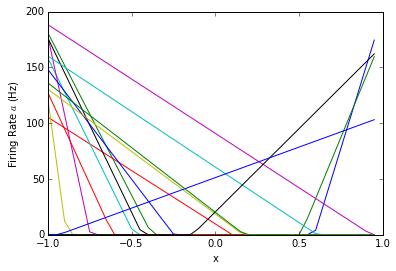

decoders: [[  1.06792827e-03]
 [  5.22413209e-05]
 [ -1.52881367e-04]
 [  2.97897451e-05]
 [  5.43898621e-05]
 [ -2.42995131e-04]
 [ -4.45024145e-05]
 [ -1.04699023e-04]
 [ -2.35745756e-04]
 [ -3.39193563e-05]
 [ -4.45101733e-03]
 [ -1.31699412e-03]
 [  3.66229024e-05]
 [  1.21707659e-04]
 [  7.55596443e-03]
 [  6.75532565e-05]]


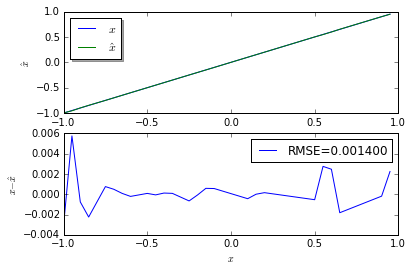

In [133]:
one_pt_one_a_thru_c()

<ol style="list-style:lower-alpha outside none;" start="4">
<li> [1 mark] Now try decoding under noise.  Add random normally distributed noise to $a$ and decode again. The noise is a random variable with mean 0 and standard deviation of 0.2 times the maximum firing rate of all the neurons.  Resample this variable for every different $x$ value for every different neuron.  Create all the same plots as in part c).  Report the Root Mean Squared Error value.
</li>
</ol>

In [134]:
def one_pt_one_d():    #1.1d

    n_neurons=16
    min_fire_rate=100
    max_fire_rate=200
    min_x=-1
    max_x=1
    max_rate_array=np.random.uniform(min_fire_rate,max_fire_rate,n_neurons)
    x_intercept_array=np.random.uniform(min_x,max_x,n_neurons)
    encoders=-1+2*np.random.randint(2,size=n_neurons)
    dx=0.05
    x=np.vstack(np.arange(min_x,max_x,dx))
    S=len(x)

    noise=0.2*np.max(max_rate_array)
    neurons=ReLUneurons(n_neurons,x_intercept_array,max_rate_array,x,encoders,noise)
    neuron_responses(neurons,x,noise)
    d=get_optimal_decoders(neurons,x,S)    #noiseless optimization with noisy rates
    # print d
    xhat=get_state_estimate(neurons,x,d,noise)    #noisy rates

    fig=plt.figure()
    ax=fig.add_subplot(211)
    ax.plot(x,x,'b',label='$x$')
    ax.plot(x,xhat,'g',label='$\hat{x}$')
    ax.set_ylim(-1,1)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$\hat{x}$')
    legend=ax.legend(loc='best',shadow=True)
    ax=fig.add_subplot(212)
    ax.plot(x,x-xhat)
    ax.set_xlim(-1,1)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$x - \hat{x}$')
    legend=ax.legend(['RMSE=%f' %np.sqrt(np.average((x-xhat)**2))],loc='best') 
    plt.show()        

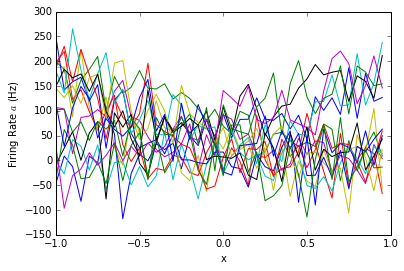

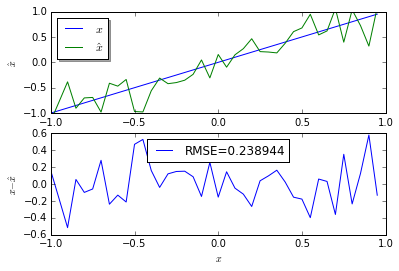

In [150]:
one_pt_one_d()

<ol style="list-style:lower-alpha outside none;" start="5">
<li>[1 mark] Recompute the decoders $d_i$ taking noise into account (as shown in class).  Show how these decoders behave when decoding both with and without noise added to $a$ by making the same plots as in c) and d).  Report the RMSE for both cases. As in the previous question, $\sigma$ is 0.2 times the maximum firing rate of all the neurons.
</li></ul>
</li>
</ol>

In [136]:
def one_pt_one_e():    #1.1e
    
    n_neurons=16
    min_fire_rate=100
    max_fire_rate=200
    min_x=-1
    max_x=1
    max_rate_array=np.random.uniform(min_fire_rate,max_fire_rate,n_neurons)
    x_intercept_array=np.random.uniform(min_x,max_x,n_neurons)
    encoders=-1+2*np.random.randint(2,size=n_neurons)
    dx=0.05
    noise=0
    x=np.vstack(np.arange(min_x,max_x,dx))
    S=len(x)

    noise=0.2*np.max(max_rate_array)
    neurons=ReLUneurons(n_neurons,x_intercept_array,max_rate_array,x,encoders,noise)
    neuron_responses(neurons,x,noise)
    d1=get_optimal_decoders(neurons,x,S)        #noiseless optimization with noisy rates
    d2=get_optimal_decoders_noisy(neurons,x,S,noise)    #noisy optimization with noisy rates
    xhat1=get_state_estimate(neurons,x,d1,noise)    #noisy rates
    xhat2=get_state_estimate(neurons,x,d2,noise)    #noisy rates

    fig=plt.figure()
    ax=fig.add_subplot(211)
    ax.plot(x,x,'b',label='$x$')
    ax.plot(x,xhat1,'g',label='$\hat{x}$ d w/o noise')
    ax.set_ylim(-1,1)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$\hat{x}$')
    legend=ax.legend(loc='best',shadow=True)
    ax=fig.add_subplot(212)
    ax.plot(x,x-xhat1)
    ax.set_xlim(-1,1)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$x - \hat{x}$')
    legend=ax.legend(['RMSE=%f' %np.sqrt(np.average((x-xhat1)**2))],loc='best')

    fig=plt.figure()
    ax=fig.add_subplot(211)
    ax.plot(x,x,'b',label='$x$')
    ax.plot(x,xhat2,'g',label='$\hat{x}$ d w/ noise')
    ax.set_ylim(-1,1)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$\hat{x}$')
    legend=ax.legend(loc='best',shadow=True)
    ax=fig.add_subplot(212)
    ax.plot(x,x-xhat2)
    ax.set_xlim(-1,1)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$x - \hat{x}$')
    legend=ax.legend(['RMSE=%f' %np.sqrt(np.average((x-xhat2)**2))],loc='best') 
    plt.show()

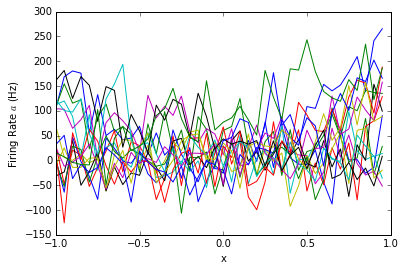

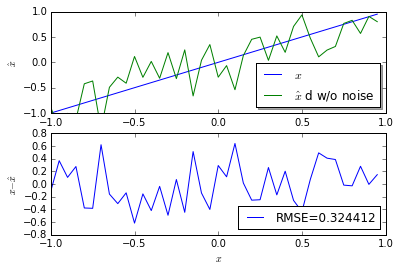

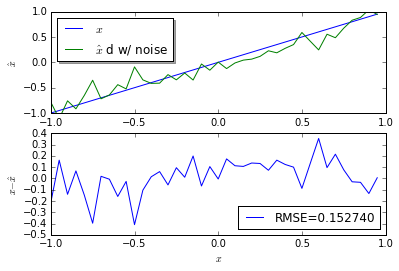

In [137]:
one_pt_one_e()

<ol style="list-style:lower-alpha outside none;" start="6">
<li> [1 mark] Show a 2x2 table of the four RMSE values reported in parts c), d), and e).  This should show the effects of adding noise and whether or not the decoders $d$ are computed taking noise into account.  Write a few sentences commenting on what the table shows.
</li>
</ol>

In [138]:
def one_pt_one_f():     #1.1f

    n_neurons=16
    min_fire_rate=100
    max_fire_rate=200
    min_x=-1
    max_x=1
    max_rate_array=np.random.uniform(min_fire_rate,max_fire_rate,n_neurons)
    x_intercept_array=np.random.uniform(min_x,max_x,n_neurons)
    encoders=-1+2*np.random.randint(2,size=n_neurons)
    dx=0.05
    x=np.vstack(np.arange(min_x,max_x,dx))
    S=len(x)
    #noisy activity is calculated when neurons are created, so I do that here, then call
    #either get_rates() or get_rates_noisy as appropriate
    noise=0.2*np.max(max_rate_array)
    neurons=ReLUneurons(n_neurons,x_intercept_array,max_rate_array,x,encoders,noise)

    #noiseless activity, noiseless decoding
    d1=get_optimal_decoders(neurons,x,S)
    xhat1=get_state_estimate(neurons,x,d1,0)
    rmse1=np.sqrt(np.average((x-xhat1)**2))
    #noiseless activity, noisy decoding
    d2=get_optimal_decoders_noisy(neurons,x,S,noise)
    xhat2=get_state_estimate(neurons,x,d2,0)
    rmse2=np.sqrt(np.average((x-xhat2)**2))
    #noisy activity, noiseless decoding
    d3=get_optimal_decoders(neurons,x,S)
    xhat3=get_state_estimate(neurons,x,d3,noise)
    rmse3=np.sqrt(np.average((x-xhat3)**2))
    #noisy activity, noisy decoding
    d4=get_optimal_decoders_noisy(neurons,x,S,noise)
    xhat4=get_state_estimate(neurons,x,d4,noise)
    rmse4=np.sqrt(np.average((x-xhat4)**2))

    rmse_table_code=np.matrix([
        ['clean a, clean d',
         'clean a, noisy d'],
        ['noisy a, clean d',
         'noisy a, noisy d']
        ])
    rmse_table=np.matrix([[rmse1, rmse2], [rmse3, rmse4]])
    print rmse_table_code
    print rmse_table

In [139]:
one_pt_one_f()

[['clean a, clean d' 'clean a, noisy d']
 ['noisy a, clean d' 'noisy a, noisy d']]
[[ 0.00069024  0.06421082]
 [ 0.40976505  0.20133093]]


### The root mean squared error (RMSE) is a measure of the error between the original state $x$ and the estimated state $\hat{x}$. As we would expect, when the neurons representing the state have no noise added to them, and the decoders $d$ are calculated using the matrix of the neurons' noiseless activities $A$, the state can be estimated with very high precision, leading to the lowest RMSE. When noise is injected into $A$, and $d$ is computed on the noiseless $A$ matrix, the decoders do not account for the fluctuating firing rates of the neurons, and hence do the worst job estimating the state (have the highest RMSE). When $d$ is calculated taking noise into account, it performs a far better estimation of the state: in the case of noiseless $A$, the noisy decoding introduces some suboptimal error into $\hat{x}$, producing an RMSE than is slighly higher than the noiseless decoding (second lowest). However, it improves the estimation of the noisy activity matrix a significant amount. This RMSE (second highest) is inevitably higher under noisy activities than with noiseless $A$.

### 1.2) Exploring sources of error

Use the program you wrote in 1.1 to examine the sources of error in the representation.

<ol style="list-style:lower-alpha outside none;" start="1">
<li>[2 marks] Plot the error due to distortion $E_{dist}$ and the error due to noise $E_{noise}$ as a function of $N$, the number of neurons. Use the equation with those two parts as your method (2.9 in the book). Generate two different loglog plots (one for each type of error) with $N$ values of [4, 8, 16, 32, 64, 128, 256, 512] (and more, if you would like).  For each $N$ value, do at least 5 runs and average the results.  For each run, different $\alpha$, $J^{bias}$, and $e$ values should be generated for each neuron.  Compute $d$ under noise, with $\sigma$ equal to 0.1 times the maximum firing rate.  Show visually that the errors are proportional to $1/N$ or $1/N^2$ (see figure 2.6 in the book).
</li>
</ol>
<ol style="list-style:lower-alpha outside none;" start="2">
<li>[1 mark] Repeat part a) with $\sigma$ equal to 0.01 times the maximum firing rate.
</li>
</ol>

In [140]:
def one_pt_two(): #1.2a-b

    N_list=[4,8,16,32,64,128,256,512]
    averages=20
    dx=0.05
    min_fire_rate=100
    max_fire_rate=200
    min_x=-0.95
    max_x=0.95
    tau_ref=0.002
    tau_rc=0.02
    x=np.vstack(np.arange(min_x,max_x,dx))

    noise_mag=0.1
    E_dist1,E_noise1 = error_vs_neurons(N_list,min_fire_rate,max_fire_rate,min_x,max_x,x,noise_mag,averages,tau_ref,tau_rc,'ReLU')
    noise_mag=0.01
    E_dist2,E_noise2 = error_vs_neurons(N_list,min_fire_rate,max_fire_rate,min_x,max_x,x,noise_mag,averages,tau_ref,tau_rc,'ReLU')

    fig=plt.figure()
    ax=fig.add_subplot(211)
    ax.loglog(N_list,E_dist1,'b',label='$E_{dist}$, $\\sigma=0.1$')
    ax.loglog(N_list,E_dist2,'r',label='$E_{dist}$, $\\sigma=0.01$')
    ax.loglog(N_list,1./np.square(N_list),'g',label='$1/n^2$')
    ax.set_xlabel('neurons')
    ax.set_ylabel('$E_{dist}$')
    legend=ax.legend(loc='best',shadow=True)
    ax=fig.add_subplot(212)
    ax.loglog(N_list,E_noise1,'b',label='$E_{noise}$, $\\sigma=0.1$')
    ax.loglog(N_list,E_noise2,'r',label='$E_{noise}$, $\\sigma=0.01$')
    ax.loglog(N_list,1./np.array(N_list),'g',label='$1/n$')
    legend=ax.legend(loc='best',shadow=True)
    ax.set_xlabel('neurons')
    ax.set_ylabel('$E_{noise}$')
    plt.show()

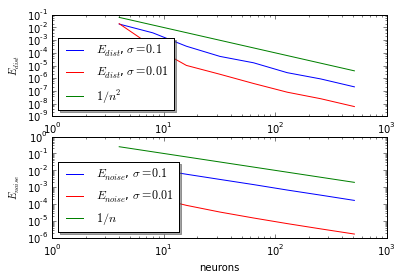

In [141]:
one_pt_two()

<ol style="list-style:lower-alpha outside none;" start="3">
<li> [1 mark] What does the difference between the graphs in a) and b) tell us about the sources of error in neural populations?
</li>
</ol>

### $E_{dist}$, the error due to static distortion, is inherent in the representation of a state variable in a neural population. Plotting this error as a function of the number of neurons reprsenting the value, we see $E_{dist}$ falls as $1/n^2$. $E_{noise}$, the error due to noise, is inherent in the representation of a state variable in a neural population. Plotting this error as a function of the number of neurons in the population, we see $E_{noise}$ falls as $1/n$. While both these plots confirm our intuition that increasing neurons improves representational accuracy, the steeper slope of the $E_{dist}$ drop implies that as neuron numbers rise, the major source of error will be due to noise rather than static distortion. This result holds over the magnitude of injected noise $\sigma$: while decreasing this parameter shifts the curve downward towards less absolute error, the scaling remains the same.

### 1.3) Leaky Integrate-and-Fire neurons

Change the code to use the LIF neuron model: 

$$
a_i = \begin{cases}
    {1 \over {\tau_{ref}-\tau_{RC}ln(1-{1 \over J})}} &\mbox{if } J>1 \\ 
    0 &\mbox{otherwise} 
    \end{cases}
$$


<ol style="list-style:lower-alpha outside none;" start="1">
<li> [1 mark] Generate the same plot as 1.1a).  Use $\tau_{ref}=0.002$s and $\tau_{RC}=0.02$s. You will need to compute new $\alpha$ and $J^{bias}$ values that will achieve the desired tuning curves (uniform distribution of x-intercepts between -1 and 1, and maximum firing rates between 100Hz and 200Hz).  Since you know two points on the tuning curve (the x-intercept and the point where it hits maximum firing), this gives you 2 equations and 2 unknowns, so you can find $\alpha$ and $J^{bias}$ by substituting and rearranging.
</li></ul>
</li>
</ol>

### Again, solve for the gains $\alpha_i$ and biases $J_i^{bias}$. The same two conditions are necessary: the maximum firing rate occurs at the maximum $J_i$, and the maximum $J_i$ occurs at the maximum value of $x=1$; and firing rate drops to zero at the x-intercept, which here occurs when $J_i=1$. These can be formulated into two equations:

$$
a_{max} = {1 \over {\tau_{ref}-\tau_{RC}ln(1-{1 \over J_i})}} \\
1 = \alpha_i * x_{int} + J_i^{bias}
$$

Solving this system yields the desired quantities as a funciton of the known quantities

$$
\alpha_i = {1 \over {1-x_{int}}} * (-1 + {1 \over {1-exp({a_{max}*\tau_{ref} - 1 \over {a_{max}*\tau_{rc}}})}}) \\
J_i^{bias} = 1 - \alpha_i * x_{int}
$$

Now we can construct the ReLU neurons with $x_{int}$ and $a_{max}$ as inputs

<ol style="list-style:lower-alpha outside none;" start="2">
<li> [2 marks] Generate the same plots as 1.1e), and report the RMSE for both.
</li>
</ol>

In [151]:
def one_pt_three():    #1.3

    n_neurons=16
    min_fire_rate=100
    max_fire_rate=200
    min_x=-1
    max_x=1
    max_rate_array=np.random.uniform(min_fire_rate,max_fire_rate,n_neurons)
    x_intercept_array=np.random.uniform(min_x,max_x,n_neurons)
    encoders=-1+2*np.random.randint(2,size=n_neurons)
    dx=0.05
    x=np.vstack(np.arange(min_x,max_x,dx))
    tau_ref=0.002
    tau_rc=0.02
    S=len(x)
    noise=0.0

    noise=0.2*np.max(max_rate_array)
    neurons=LIFneurons(n_neurons,x_intercept_array,max_rate_array,x,encoders,tau_ref,tau_rc,noise)
    neuron_responses(neurons,x,noise)
    d1=get_optimal_decoders(neurons,x,S)        #noiseless optimization with noisy rates
    d2=get_optimal_decoders_noisy(neurons,x,S,noise)    #noisy optimization with noisy rates
    xhat1=get_state_estimate(neurons,x,d1,noise)    #noisy rates
    xhat2=get_state_estimate(neurons,x,d2,noise)    #noisy rates

    fig=plt.figure()
    ax=fig.add_subplot(211)
    ax.plot(x,x,'b',label='$x$')
    ax.plot(x,xhat1,'g',label='$\hat{x}$ d w/o noise')
    ax.set_ylim(-1,1)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$\hat{x}$')
    legend=ax.legend(loc='best',shadow=True)
    ax=fig.add_subplot(212)
    ax.plot(x,x-xhat1)
    ax.set_xlim(-1,1)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$x - \hat{x}$')
    legend=ax.legend(['RMSE=%f' %np.sqrt(np.average((x-xhat1)**2))],loc='best')

    fig=plt.figure()
    ax=fig.add_subplot(211)
    ax.plot(x,x,'b',label='$x$')
    ax.plot(x,xhat2,'g',label='$\hat{x}$ d w/ noise')
    ax.set_ylim(-1,1)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$\hat{x}$')
    legend=ax.legend(loc='best',shadow=True)
    ax=fig.add_subplot(212)
    ax.plot(x,x-xhat2)
    ax.set_xlim(-1,1)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$x - \hat{x}$')
    legend=ax.legend(['RMSE=%f' %np.sqrt(np.average((x-xhat2)**2))],loc='best') 
    plt.show()

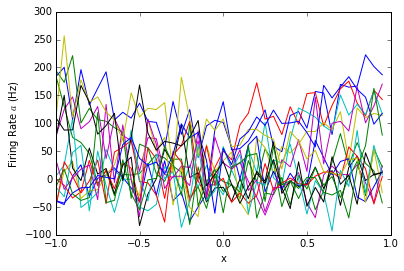

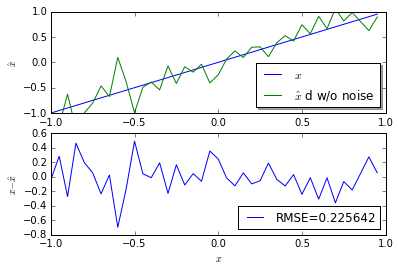

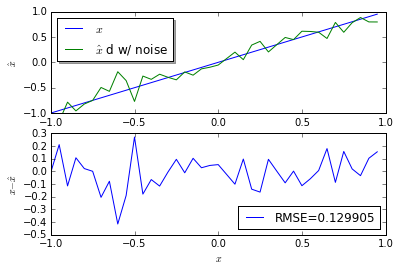

In [152]:
one_pt_three()

## 2) Representation of Vectors

### 2.1) Vector tuning curves

<ol style="list-style:lower-alpha outside none;" start="1">
<li> [1 mark] Plot the tuning curve of an LIF neuron whose 2D preferred direction vector is at an angle of $\theta=-\pi/4$, has an x-intercept at the origin (0,0), and has a maximum firing rate of 100Hz.

<ul><li> Remember that $J=\alpha e \cdot x + J^{bias}$, and both $x$ and $e$ are 2D vectors.</li>
<li> In the scalar case (that you did in question 1.1a), the maximum firing rate occurred when $x=1$ for neurons with $e=1$ and at $x=-1$ for neurons with $e=-1$.  Of course, if the graph in 1.1a was extended to $x>1$ (or $x<-1$), neurons would start firing faster than their maximum firing rate.  Similarly, here the "maximum firing rate" means the firing rate when $x=e$.  This should allow you to reuse your code from 1.3a) to compute $\alpha$ and $J^{bias}$ for a desired maximum firing rate and x-intercept.</li>
</ul>
</li>
</ol>
<ol style="list-style:lower-alpha outside none;" start="2">
<li> [1 mark] Plot the tuning curve for the same neuron as in a), but only considering the points around the unit circle.  This will be similar to Figure 2.8b in the book.  Fit a curve of the form $Acos(B\theta+C)+D$ to the tuning curve and plot it as well.  What makes a cosine a good choice for this?  Why does it differ from the ideal curve?
</ul>
</li>
</ol>

In [144]:
def two_pt_one():

    n_neurons=1
    max_fire_rate=100
    max_rate_array=[max_fire_rate]
    x1_min=-1
    x1_max=1
    x2_min=-1
    x2_max=1
    dx=0.05
    x_intercept_array=[[0,0]]
    encoders=[[1,-1]]    #preferred direction theta=-pi/4
    encoders=encoders/np.linalg.norm(encoders)
    # print encoders
    dx=0.05
    tau_ref=0.002
    tau_rc=0.02
    # S=len(x)
    noise=0.0

    x1 = np.arange(x1_min, x1_max, dx)
    x2 = np.arange(x2_min, x2_max, dx)
    x=np.vstack(np.meshgrid(x1, x2)).reshape(2,-1).T
    neurons=LIFneurons(n_neurons,x_intercept_array,max_rate_array,x,encoders,tau_ref,tau_rc,noise)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('Firing Rate (Hz)')
    for i in range(len(x1)):
        xs=x1[i]
        for j in range(len(x2)):
            ys=x2[j]
            zs = neurons[0].get_sample_rates()[i*len(x2)+j]
            ax.scatter(xs,ys,zs)
    plt.show()

    angles=np.linspace(0,2*np.pi,100)
    x=[[np.cos(a),np.sin(a)] for a in angles]

    neurons=LIFneurons(n_neurons,x_intercept_array,max_rate_array,x,encoders,tau_ref,tau_rc,noise)
    y=neurons[0].get_sample_rates()
    def fit_cos(theta, A,B,C,D):
        return A*np.cos(B*theta+C)+D     #fitted cosine
    def fit_rec_cos(theta, A,B,C,D):
        return np.maximum(A*np.cos(B*theta+C)+D,0)     #fitted rectified cosine
    popt,pconv = curve_fit(fit_cos,angles,y)
    popt_rec,pconv_rec = curve_fit(fit_rec_cos,angles,y)
    y_fit=fit_cos(angles,*popt)
    y_fit_rec=fit_rec_cos(angles,*popt_rec)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel('$\\theta$ (radians)')
    ax.set_ylabel('Firing Rate (Hz)')
    ax.plot(angles/(2*np.pi),y,label='Neural Responses')
    ax.plot(angles/(2*np.pi),y_fit,label='Fitted Cosine')
    ax.plot(angles/(2*np.pi),y_fit_rec,label='Fitted Rectified Cosine')
    legend=ax.legend(loc='best',shadow=True)
    plt.show()

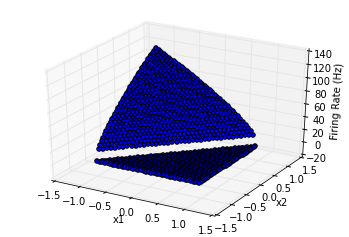

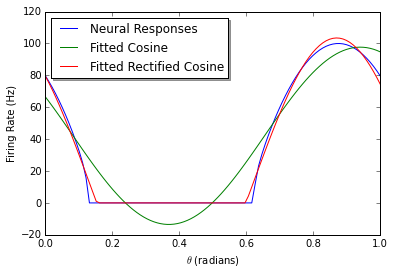

In [145]:
two_pt_one()

### Cosine is a good choice of function to fit the neural response becaues it traces out the unit circle, the same sweep as is made by changing the angle $\theta$. It is not ideal becaues the LIF neurons drop to zero activity when the state $x$ points in the direction opposite their preferred direction (the endocoder $(-1,1)$), creating a region of zero activity. The fit can be improves by fitting a rectified cosine function, as I have done above (thanks Xuan for suggesting). 

### 2.2 Vector representation

<ol style="list-style:lower-alpha outside none;" start="1">
<li> [1 mark] Generate a set of 100 random unit vectors uniformly distributed around the unit circle.  These will be the encoders $e$ for 100 neurons.  Plot these vectors.
</li>
</ol>
<ol style="list-style:lower-alpha outside none;" start="2">
<li> [1 mark] Compute the optimal decoders.  Use LIF neurons with the same properties as in question 1.3.  When computing the decoders, take into account noise with $\sigma$ as 0.2 times the maximum firing rate.  Plot the decoders.  How do these decoding vectors compare to the encoding vectors? Note that the decoders will also be 2D vectors. In the scalar case, you used $x$ values between -1 and 1, with $dx=0.05$.  In this case, you can regularly tile the 2D $x$ values ([1, 1], [1, 0.95], ... [-1, -0.95], [-1, 1]).  Alternatively, you can just randomly choose 1600 different $x$ values to sample. </li>
</li>
</ol>

In [146]:
def two_pt_two_a_thru_b():     #2.2a-b

    points=100
    n_neurons=100
    angles=np.random.uniform(0,2*np.pi,n_neurons)
    encoders=np.array([[np.cos(a),np.sin(a)] for a in angles])

    min_fire_rate=100
    max_fire_rate=200
    max_rate_array=np.random.uniform(min_fire_rate,max_fire_rate,n_neurons)
    x1_min=-1
    x1_max=1
    x2_min=-1
    x2_max=1
    x_intercept_array=[[np.random.uniform(x1_min,x1_max),np.random.uniform(x2_min,x2_max)] for n in range(n_neurons)]
    dx=0.05
    x1 = np.arange(x1_min, x1_max, dx)
    x2 = np.arange(x2_min, x2_max, dx)
    x=np.vstack(np.meshgrid(x1, x2)).reshape(2,-1).T
    tau_ref=0.002
    tau_rc=0.02
    S=len(x)
    noise=0.2*np.max(max_rate_array)

    neurons=LIFneurons(n_neurons,x_intercept_array,max_rate_array,x,encoders,tau_ref,tau_rc,noise)
    d=get_optimal_decoders_noisy(neurons,x,S,noise)    #noisy optimization with noisy rates

    fig = plt.figure()
    ax = fig.add_subplot(211)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    for e in encoders:
        ax.plot([0,e[0]],[0,e[1]])
    legend=ax.legend(['encoders'],loc='best',shadow=True)
    ax = fig.add_subplot(212)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    for di in np.array(d):
        ax.plot([0,di[0]],[0,di[1]])
    legend=ax.legend(['decoders'],loc='best',shadow=True)
    plt.show()


### Make the jump to light speed.

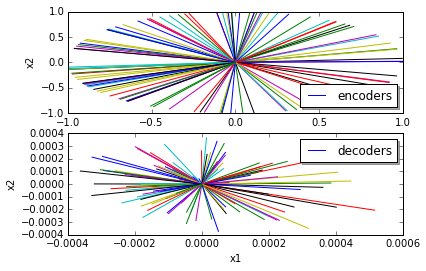

In [147]:
two_pt_two_a_thru_b()

### The decoding vectors point in the same direction as the encoding vectors, but are scaled downwards by some amount.

<ol style="list-style:lower-alpha outside none;" start="3">
<li> [1 mark] Generate 20 random $x$ values over the unit circle (i.e. with different directions and radiuses).  For each $x$ value, determine the neural activity $a$ for each of the 100 neurons.  Now decode these values (i.e. compute $\hat{x}$) using the decoders from part b).  Plot the original and decoded values on the same graph in different colours, and compute the RMSE.
</li>
</ol>
<ol style="list-style:lower-alpha outside none;" start="4">
<li> [2 marks] Repeat part c) but use the *encoders* as decoders.  This is what Georgopoulos used in his original approach to decoding information from populations of neurons.  Plot the decoded values this way and compute the RMSE.  In addition, recompute the RMSE in both cases, but ignoring the magnitude of the decoded vector.  What are the relative merits of these two approaches to decoding?
</ul>
</li>
</ol>

In [148]:
def two_pt_two_c_thru_d():     #2.2c

    points=20
    n_neurons=100
    min_fire_rate=100
    max_fire_rate=200
    x1_min=-1
    x1_max=1
    x2_min=-1
    x2_max=1
    dx=0.05
    tau_ref=0.002
    tau_rc=0.02
    x1 = np.arange(x1_min, x1_max, dx)
    x2 = np.arange(x2_min, x2_max, dx)
    x_sample=np.vstack(np.meshgrid(x1, x2)).reshape(2,-1).T
    max_rate_array=np.random.uniform(min_fire_rate,max_fire_rate,n_neurons)
    x_intercept_array=[[np.random.uniform(x1_min,x1_max),np.random.uniform(x2_min,x2_max)] for n in range(n_neurons)]
    noise=0.2*np.max(max_rate_array)

    angles=np.random.uniform(0,2*np.pi,points)     #note: does not distribute uniformally over the unit circle
    radii=np.random.uniform(0,1,points)     #but creates a high density of points near the center
    x=np.vstack([radii*np.cos(angles),radii*np.sin(angles)]).reshape(2,-1).T
    S=len(x)

    angles_enc=np.random.uniform(0,2*np.pi,n_neurons)     #note: does not distribute uniformally over the unit circle
    encoders=np.array([[np.cos(a),np.sin(a)] for a in angles_enc])
    S=len(x)

    neurons=LIFneurons(n_neurons,x_intercept_array,max_rate_array,x_sample,encoders,tau_ref,tau_rc,noise)
    d=get_optimal_decoders_noisy(neurons,x_sample,S,noise)    #noisy optimization with noisy rates
    xhat=get_state_estimate(neurons,x,d,noise)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    for xi in x:
        ax.plot([0,xi[0]],[0,xi[1]],'b')
    for xhati in xhat:
        ax.plot([0,xhati[0]],[0,xhati[1]],'g')
    legend=ax.legend(['$x$','$\hat{x}$, RMSE=%f' %np.sqrt(np.average((x-xhat)**2))],loc='best',shadow=True)
    plt.show()

    #2.2d
    xhat2=get_state_estimate(neurons,x,encoders,noise)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    for xi in xhat2:
        ax.plot([0,xi[0]],[0,xi[1]],'b')
    legend=ax.legend(['$\hat{x}$ w/ encoders, RMSE=%f' %np.sqrt(np.average((x-xhat2)**2))],loc='best',shadow=True)
    plt.show()

    
    xhat3=np.array([xi/np.linalg.norm(xi) for xi in xhat])        
    xhat4=np.array([xi/np.linalg.norm(xi) for xi in xhat2])
    
    fig=plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    for xhat3i in xhat3:
        ax.plot([0,xhat3i[0]],[0,xhat3i[1]],'b')
    for xhat4i in xhat4:
        ax.plot([0,xhat4i[0]],[0,xhat4i[1]],'g')
    legend=ax.legend(
        ['$\hat{x}$ w/ decoders, normalized, RMSE=%f' %np.sqrt(np.average((x-xhat3)**2)),
        '$\hat{x}$ w/ encoders, normalized, RMSE=%f' %np.sqrt(np.average((x-xhat4)**2))],
        loc='best', shadow=True) 
    plt.show()

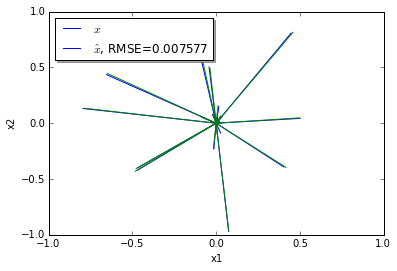

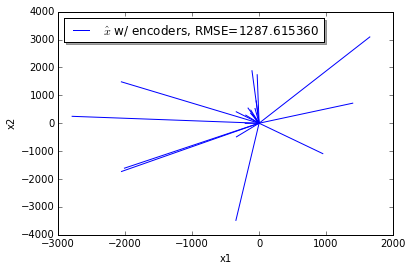

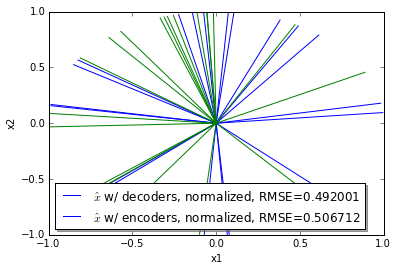

In [149]:
two_pt_two_c_thru_d()

### The first approach requires that the decoders be computed using the NEF, which can be a computationally intensive operation. However, it produces much lower RMSE than using the approach of Georgopoulos, which has the primary problem that it only decodes angle and not radius (hence the huge and variable length of his vectors). Even when both the resulting estimates are normalized to the unit circle, the decoders produce a smaller RMSE.